#### V. Vallusova "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work." 

# Mid-term (Individual) Project

# 1. Business understanding

Dataset which is used in this research, you can find on the webside:
https://data.world/popculture/imdb-5000-movie-dataset

Film studios produces several hundred movies in different language. The budget of these movies are of the order of hundreds of millions of dollars. Knowing which movies are likely to succeed and which are likely to fail could beneﬁt the production houses greatly as it will enable them to focus their advertising campaigns which itself cost millions of dollars, accordingly. And it could also help them to know when it is most appropriate to release a movie by looking at the overall market.  

(PDF) Predicting Movie Success Based on IMDB Data. Available from: https://www.researchgate.net/publication/282133920_Predicting_Movie_Success_Based_on_IMDB_Data [accessed Oct 10 2018].

Dataset consists of data:

    movie_title                        Title of the Movie
    duration                           Duration in minutes
    director_name                      Name of the Director of the Movie
    director_facebook_likes            Number of likes of the Director on his Facebook Page
    actor_1_name                       Primary actor starring in the movie
    actor_1_facebook_likes             Number of likes of the Actor_1 on his/her Facebook Page
    actor_2_name                       Other actor starring in the movie
    actor_2_facebook_likes             Number of likes of the Actor_2 on his/her Facebook Page
    actor_3_name                       Other actor starring in the movie
    actor_3_facebook_likes             Number of likes of the Actor_3 on his/her Facebook Page
    num_user_for_reviews               Number of users who gave a review
    num_critic_for_reviews             Number of critical reviews on imdb
    num_voted_users                    Number of people who voted for the movie
    cast_total_facebook_likes          Total number of facebook likes of the entire cast of the movie
    movie_facebook_likes               Number of Facebook likes in the movie page
    plot_keywords                      Keywords describing the movie plot
    facenumber_in_poster               Number of the actor who featured in the movie poster
    color                              Film colorization. ‘Black and White’ or ‘Color’
    genres                             Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’
    title_year                         The year in which the movie is released (1916:2016)
    language                           English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc
    country                            Country where the movie is produced
    content_rating                     Content rating of the movie
    aspect_ratio                       Aspect ratio the movie was made in
    movie_imdb_link                    IMDB link of the movie
    gross                              Gross earnings of the movie in Dollars
    budget                             Budget of the movie in Dollars
    imdb_score                         IMDB Score of the movie on IMDB

### What are the project’s goals?

If it was somehow possible to know beforehand the likelihood of success of the movies, the production houses could adjust the release of their movies so as to gain maximum proﬁt. They could use the predictions to know when the market is dull and when it is not. 

(PDF) Predicting Movie Success Based on IMDB Data. Available from: https://www.researchgate.net/publication/282133920_Predicting_Movie_Success_Based_on_IMDB_Data [accessed Oct 10 2018].

### If you’re hired as a data/business analyst to predict how well a movie will perform in theaters, what kind of data would you collect?

For prediction how a movie will be perform I would looking for data:

    director name - name of the movie director
    main actor name - name of the first actor in the movie
    duration
 
From the social media like Facebook or Twitter I can find lots of important informations about number of voted user, number of critics for review and number of user for reviews. It is possible to see if people are interesting about movie, if they are looking forward to see this movie in the cinema. We can make advertising about the movie.

### What variables are highly correlated to imdb score?

In [2]:
#list of highly correlated variables to imdb score
corr = pd.DataFrame(df.corr()['imdb_score'].drop('imdb_score'))
corr.sort_values(['imdb_score'], ascending = False)

,imdb_score
num_voted_users,0.410965
num_critic_for_reviews,0.305303
num_user_for_reviews,0.292475
duration,0.261662
movie_facebook_likes,0.247049
gross,0.198021
director_facebook_likes,0.170802
cast_total_facebook_likes,0.085787
actor_2_facebook_likes,0.083808
actor_1_facebook_likes,0.076099


    The highly correlated to imdb_score are:
        num_voted_user
        num_critic_for_reviews
        num_user_for_reviews
        duration

# 2. Data understanding

In [3]:
#import libraries and read data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("data/movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


#### Describe data
The initial dataset to be used will be collected from IMDb.It will consist of movies that were released from year 1916 to 2016. For each film I can see direct name, duration, country, language, movie type and other movie characteristics

    - movie can be black and white or colorfull
    - duration movie average is 107 minutes
    - the highest number of likes on the facebbook platform has Joseph Gordon-Levitt
    - John Blanchard has the best imdb_score
    - Steven Spielberg is the most common movie director in dataset
    - the most popular actor is Robert De Niro
    - the actor with the higher number of likes on the Facebook is Darcy Donavan
    - the most popular movies are produced in USA

In [4]:
#the last year in dataset
df['title_year'].max()

2016.0

In [5]:
#the first year in dataset
df['title_year'].min()

1916.0

In [6]:
#unique values in color column
df['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [7]:
#the average of movie duration
df['duration'].mean()

107.2010739856802

In [8]:
#the best director in terms of facebook likes
df.groupby('director_name')['director_facebook_likes'].max().sort_values(ascending=False).head(3)

director_name
Joseph Gordon-Levitt    23000.0
Christopher Nolan       22000.0
David Fincher           21000.0
Name: director_facebook_likes, dtype: float64

In [9]:
#the best director in terms of imdb score
df.groupby('director_name')['imdb_score'].mean().sort_values(ascending=False).head(3)

director_name
John Blanchard      9.5
Sadyk Sher-Niyaz    8.7
Mitchell Altieri    8.7
Name: imdb_score, dtype: float64

In [10]:
#director with the highest number of movies
df.groupby('director_name').size().sort_values(ascending=False).head(3)

director_name
Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
dtype: int64

In [11]:
#actor who played in the most movie
df.groupby('actor_1_name').size().sort_values(ascending=False).head(3)

actor_1_name
Robert De Niro    49
Johnny Depp       41
Nicolas Cage      33
dtype: int64

In [12]:
#actor who has the most like on the facebook
df.groupby('actor_1_name')['actor_1_facebook_likes'].max().sort_values(ascending=False).head(3)

actor_1_name
Darcy Donavan    640000.0
Matthew Ziff     260000.0
Krista Allen     164000.0
Name: actor_1_facebook_likes, dtype: float64

In [13]:
df.groupby('actor_1_name')['imdb_score'].max().sort_values(ascending=False).head(3)

actor_1_name
Martin Short      9.5
Morgan Freeman    9.3
Al Pacino         9.2
Name: imdb_score, dtype: float64

In [14]:
df.groupby('movie_title').size().sort_values(ascending=False).head(3)

movie_title
Halloween                    3
King Kong                    3
The Fast and the Furious     3
dtype: int64

In [15]:
df.groupby('movie_title')['imdb_score'].max().sort_values(ascending=False).head(3)

movie_title
Towering Inferno                 9.5
The Shawshank Redemption         9.3
The Godfather                    9.2
Name: imdb_score, dtype: float64

In [16]:
df.groupby('movie_title')['movie_facebook_likes'].max().sort_values(ascending=False).head(3)

movie_title
Interstellar                           349000
Django Unchained                       199000
Batman v Superman: Dawn of Justice     197000
Name: movie_facebook_likes, dtype: int64

In [17]:
#the most common movie language 
df.groupby('language').size().sort_values(ascending=False).head(3)

language
English    4704
French       73
Spanish      40
dtype: int64

In [18]:
#the most common country
df.groupby('country', sort=False).size().sort_values(ascending=False).head(3)

country
USA       3807
UK         448
France     154
dtype: int64

#### Identify data quality issues
Data set consists 28 different data information about 5043 movies. Dataset contains also data which we do not need for our analyze eg. movie_title, color, movie_imdb_link, color. These columns will be deleted. Data set also contains lots of missing values. All data with missing values will be deleted.

In [19]:
#show how many rows and columns are in dataset
df.shape

(5043, 28)

In [20]:
#show the column names
df.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [21]:
#show how many missing values are in dataset
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

#### Identify data types
Dataset contain numerical and also non-numerical values.

In [22]:
#show all columns with their type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

# 3. Data preparation

The data we obtained are highly susceptible to noisy,missing and inconsistent data due to the huge size and theirlikely origin from multiple, heterogeneous sources [2]. Wemainly used IMDb and Rotten Tomatoes and Wikipedia. Themain problem with datasets was missing ﬁelds. To overcomethis missing ﬁeld problem we adopted a method which usesa measure of central tendency for the attribute. We used bothmean and median as central tendency. Then removed duplicateitems. 

(PDF) Predicting Movie Success Based on IMDB Data. Available from: https://www.researchgate.net/publication/282133920_Predicting_Movie_Success_Based_on_IMDB_Data [accessed Oct 10 2018].

In [23]:
#remove duplicates rows
df.drop_duplicates()
#remove unnessary columns
data = df.drop(['color','actor_3_facebook_likes','actor_2_name','movie_title','plot_keywords','movie_imdb_link','content_rating','actor_2_facebook_likes','actor_3_name'], axis=1)
#display data
data.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,0.0,3054.0,English,USA,237000000.0,2009.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,0.0,1238.0,English,USA,300000000.0,2007.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,1.0,994.0,English,UK,245000000.0,2015.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,0.0,2701.0,English,USA,250000000.0,2012.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,131.0,NaN,Documentary,Doug Walker,8,143,0.0,NaN,NaN,NaN,NaN,NaN,7.1,NaN,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
facenumber_in_poster         5030 non-null float64
num_user_for_reviews         5022 non-null float64
language                     5031 non-null object
country                      5038 non-null object
budget                       4551 non-null float64
title_year                   4935 non-null float64
imdb_score                   5043 non-null float64
aspect_ratio                 4714 n

In [25]:
#show basic statistics
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,9.500000,16.000000,349000.000000


# 4. Business intelligence

#### What is the relationship between imdb_score and director facebook likes?

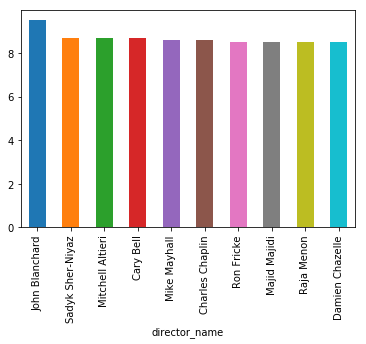

In [26]:
data.groupby('director_name')['imdb_score'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

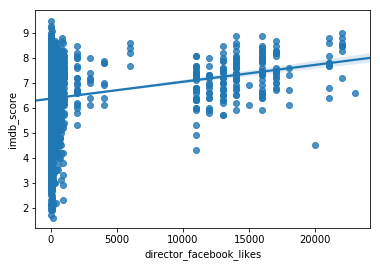

In [27]:
sns.regplot(data.director_facebook_likes, data.imdb_score)

From the graph above we can see there is correlation between imdb_score and number of director facebook likes. It means that with the higher director facebook likes (people like director), imdb score is higher.

#### What si the relationship between imdb_score and number of actor 1 facebook likes?

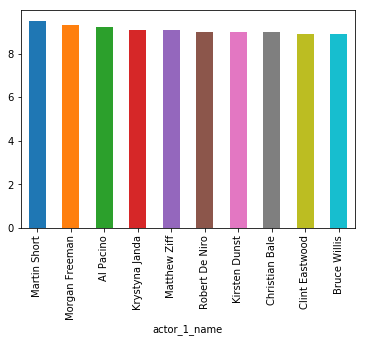

In [28]:
data.groupby('actor_1_name')['imdb_score'].max().sort_values(ascending=False).head(10).plot(kind='bar')

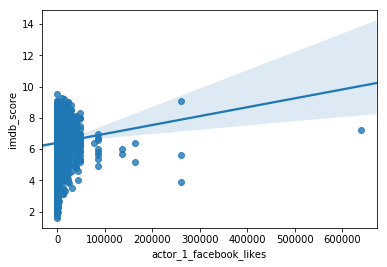

In [29]:
sns.regplot(data.actor_1_facebook_likes, data.imdb_score)

From the graph we can see there is small correlation between imdb_score and number of actor 1 facebook like. It means that with the higher actor 1 facebook likes (people like actor 1), imdb score is higher.

#### What si the relationship between imdb_score and number of voted users?

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


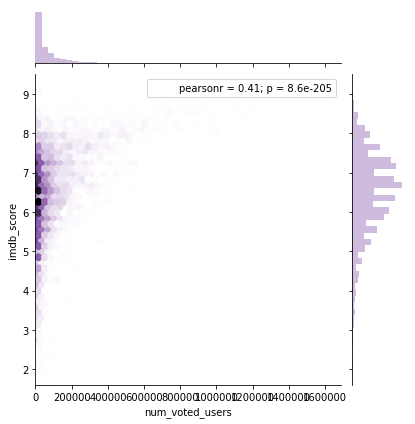

In [30]:
sns.jointplot("num_voted_users", "imdb_score", data, kind="hex", color="#8855AA")

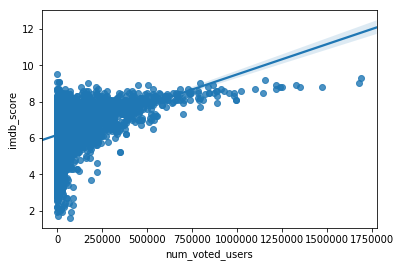

In [31]:
sns.regplot(data.num_voted_users, data.imdb_score)

There is strongly relationship between imdb_score and number of voted users. It means that with the higher number of voted users, imdb score is higher.

#### What si the relationship between imdb_score and number of critic for reviews?

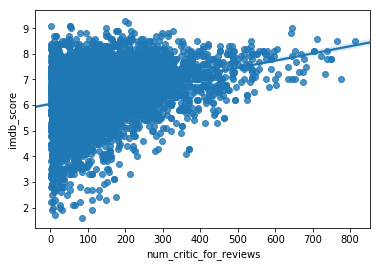

In [32]:
sns.regplot(data.num_critic_for_reviews, data.imdb_score)

There is strongly correlation between imdb_score and number of critic for reviews. It means that with the higher number of critic for reviews, imdb score is higher.

#### What si the relationship between imdb_score and number of user for reviews?

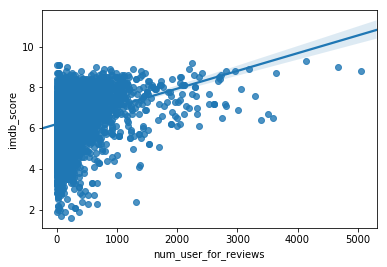

In [33]:
sns.regplot(data.num_user_for_reviews, data.imdb_score)

From the graph we can see that with the higher number of user for review, imdb_score is higher as well. There is strong correlation between imdb score and number of users for reviews

#### What si the relationship between imdb_score and duration?

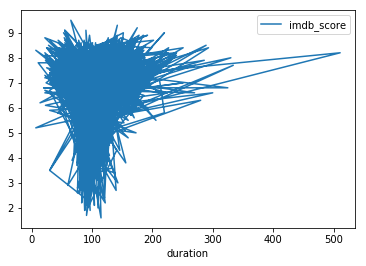

In [34]:
data.plot('duration', 'imdb_score')

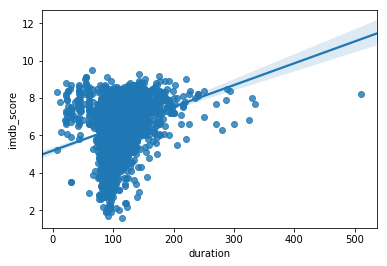

In [35]:
sns.regplot(data.duration, data.imdb_score)

There is strongly correlation between duration and imdb_score. It means that when we spend more time on creating movie, imdb score is higher.

# 5. Correlation analysis

In [36]:
data.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.305303,-0.049786,0.683176
duration,0.258486,1.000000,0.173296,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.261662,-0.090071,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.170802,0.001642,0.162048
actor_1_facebook_likes,0.190016,0.088449,0.090723,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.076099,-0.020049,0.135348
gross,0.480601,0.250298,0.144945,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.198021,0.069346,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.410965,-0.014761,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.085787,-0.017885,0.209786
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,-0.062958,0.013713,0.008918
num_user_for_reviews,0.609387,0.328403,0.221890,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.292475,-0.024719,0.400594
budget,0.119994,0.074276,0.021090,0.022639,0.102179,0.079621,0.036557,-0.019559,0.084292,1.000000,0.045726,0.030688,0.006598,0.062039


In [37]:
corr = pd.DataFrame(df.corr()['imdb_score'].drop('imdb_score'))
corr.sort_values(['imdb_score'], ascending = False)

,imdb_score
num_voted_users,0.410965
num_critic_for_reviews,0.305303
num_user_for_reviews,0.292475
duration,0.261662
movie_facebook_likes,0.247049
gross,0.198021
director_facebook_likes,0.170802
cast_total_facebook_likes,0.085787
actor_2_facebook_likes,0.083808
actor_1_facebook_likes,0.076099


C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Correlation Analysis')

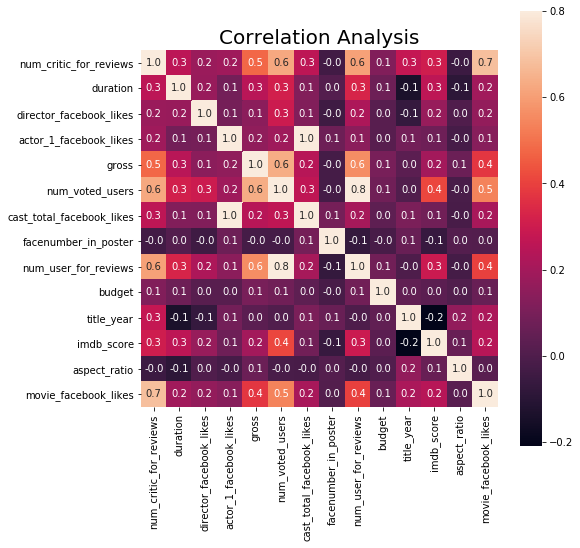

In [38]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), vmax=.8, square=True, annot=True, fmt=".1f")
describe = plt.axes()
describe.set_title('Correlation Analysis', fontsize=20)

# 6. Regression

In [39]:
data = data.drop(['director_name', 'actor_1_name', 'language', 'country', 'title_year', 'aspect_ratio'], axis=1)

In [40]:
data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,imdb_score,movie_facebook_likes
0,723.0,178.0,0.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,4834,0.0,3054.0,237000000.0,7.9,33000
1,302.0,169.0,563.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,48350,0.0,1238.0,300000000.0,7.1,0
2,602.0,148.0,0.0,11000.0,200074175.0,Action|Adventure|Thriller,275868,11700,1.0,994.0,245000000.0,6.8,85000
3,813.0,164.0,22000.0,27000.0,448130642.0,Action|Thriller,1144337,106759,0.0,2701.0,250000000.0,8.5,164000
4,NaN,NaN,131.0,131.0,NaN,Documentary,8,143,0.0,NaN,NaN,7.1,0


In [41]:
df = data.dropna()
df.isnull().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_1_facebook_likes       0
gross                        0
genres                       0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
imdb_score                   0
movie_facebook_likes         0
dtype: int64

### Linear Regression

In [42]:
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
#define x & y
y= df['imdb_score']
X= df[['duration', 'director_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes',
        'facenumber_in_poster','num_user_for_reviews', 'budget', 'movie_facebook_likes']]

model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

model1.coef_

array([ 1.14998878e-02,  6.53886686e-06,  1.08325457e-05, -1.98578905e-09,
        4.12397565e-06, -9.27210557e-06, -3.54685440e-02, -4.38584779e-04,
       -2.07960551e-11,  2.07063036e-06])

In [43]:
print 'Coefficients: ', model1.coef_
print "y-intercept ", model1.intercept_

Coefficients:  [ 1.14998878e-02  6.53886686e-06  1.08325457e-05 -1.98578905e-09
  4.12397565e-06 -9.27210557e-06 -3.54685440e-02 -4.38584779e-04
 -2.07960551e-11  2.07063036e-06]
y-intercept  5.069694722215965


In [44]:
import numpy as np
pd.DataFrame(zip(X.columns, np.transpose(model1.coef_)))

,0,1
0,duration,1.149989e-02
1,director_facebook_likes,6.538867e-06
2,actor_1_facebook_likes,1.083255e-05
3,gross,-1.985789e-09
4,num_voted_users,4.123976e-06
5,cast_total_facebook_likes,-9.272106e-06
6,facenumber_in_poster,-3.546854e-02
7,num_user_for_reviews,-4.385848e-04
8,budget,-2.079606e-11
9,movie_facebook_likes,2.070630e-06


In [45]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('duration', '0.011'),
 ('director_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.035'),
 ('num_user_for_reviews', '-0.000'),
 ('budget', '-0.000'),
 ('movie_facebook_likes', '0.000')]


From linear regression we can see that there is big linear regression with director_facebook_likes and also high linear regression with num_voted_users and low linear regression with cast_total_facebook_likes.

### Multiple regression model

In [46]:
#build a simple multiple regression model
y_mul = df['imdb_score']
X_mul = df[['director_facebook_likes', 'num_voted_users']]

# build a multiple regression model below
model2 = lm.LinearRegression()
model2.fit(X_mul, y_mul)   
model2_y = model2.predict(X_mul)

model2.coef_

array([1.7851940e-05, 3.2111077e-06])

In [47]:
coef = ["%.3f" % i for i in model2.coef_]
xcolumns = [ i for i in X_mul.columns ]
zip(xcolumns, coef)

[('director_facebook_likes', '0.000'), ('num_voted_users', '0.000')]

In [48]:
print "y-intercept ", model2.intercept_

y-intercept  6.119967926145203


### Regression model based on regularization

In [49]:
#build a regularized regression model

#Ridge model
#Fit the model
rig = lm.Ridge(alpha=0.1)        #higher alpha (penality parameter), fewer predictors
rig.fit(X, y)
rig_y = rig.predict(X)


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.963510e-17
  overwrite_a=True).T


In [50]:
print 'Coefficients: ', rig.coef_
print "y-intercept ", rig.intercept_

Coefficients:  [ 1.14998859e-02  6.53887612e-06  1.08325520e-05 -1.98578877e-09
  4.12397549e-06 -9.27211296e-06 -3.54683207e-02 -4.38584607e-04
 -2.07960094e-11  2.07063003e-06]
y-intercept  5.0696946039929


In [51]:
coef = ["%.3f" % i for i in rig.coef_]
xcolumns = [ i for i in X.columns ]
zip(xcolumns, coef)

[('duration', '0.011'),
 ('director_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('facenumber_in_poster', '-0.035'),
 ('num_user_for_reviews', '-0.000'),
 ('budget', '-0.000'),
 ('movie_facebook_likes', '0.000')]

In [52]:
sorted(zip(coef, xcolumns), reverse = True)

[('0.011', 'duration'),
 ('0.000', 'num_voted_users'),
 ('0.000', 'movie_facebook_likes'),
 ('0.000', 'director_facebook_likes'),
 ('0.000', 'actor_1_facebook_likes'),
 ('-0.035', 'facenumber_in_poster'),
 ('-0.000', 'num_user_for_reviews'),
 ('-0.000', 'gross'),
 ('-0.000', 'cast_total_facebook_likes'),
 ('-0.000', 'budget')]

In [53]:
print "mean square error: ", mean_squared_error(y, rig_y)
print "variance or r-squared: ", explained_variance_score(y, rig_y)

mean square error:  0.7794143390015065
variance or r-squared:  0.3015007185403017


### Feature selection

In [54]:
from sklearn.feature_selection import RFE
#Feature selection 
lr = lm.LinearRegression()
rfe = RFE(lr, n_features_to_select=2)
rfe_y = rfe.fit(X,y)

print "Features sorted by their rank:"
print sorted(zip(map(lambda x: x, rfe.ranking_), X.columns))

Features sorted by their rank:
[(1, 'duration'), (1, 'facenumber_in_poster'), (2, 'num_user_for_reviews'), (3, 'director_facebook_likes'), (4, 'actor_1_facebook_likes'), (5, 'cast_total_facebook_likes'), (6, 'num_voted_users'), (7, 'movie_facebook_likes'), (8, 'gross'), (9, 'budget')]


### Random Forest

In [55]:
#randomforest
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#assigning columns to X and Y variables
y = df['imdb_score'] 
X = df[['duration', 'director_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes',
        'facenumber_in_poster','num_user_for_reviews', 'budget', 'movie_facebook_likes']]
#X = teams.drop(['R'], axis =1)

regr = RandomForestRegressor(random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print "mean square error: ", mean_squared_error(y, regr_predicted)
print "variance or r-squared: ", explained_variance_score(y, regr_predicted)

mean square error:  0.09976097938144332
variance or r-squared:  0.9105991834680436


In [56]:
sorted(zip(regr.feature_importances_, X.columns))

[(0.022455480440716196, 'facenumber_in_poster'),
 (0.03712209429168495, 'actor_1_facebook_likes'),
 (0.046774654235592114, 'movie_facebook_likes'),
 (0.04818035911677494, 'director_facebook_likes'),
 (0.06184771361217585, 'cast_total_facebook_likes'),
 (0.08054758435844898, 'num_user_for_reviews'),
 (0.0896979781796065, 'gross'),
 (0.12939581784275025, 'budget'),
 (0.13165016832812618, 'duration'),
 (0.352328149594124, 'num_voted_users')]

# 7. Classification

### Data transformation

In [57]:
df['category'] = 1
df['category'][(df['imdb_score']>=14)& (df['imdb_score']<=6)] = 2
df['category'][(df['imdb_score']>6)& (df['imdb_score']<=8)] = 3
df['category'][df['imdb_score']>8] = 4
df.head()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Prog

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,imdb_score,movie_facebook_likes,category
0,723.0,178.0,0.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,4834,0.0,3054.0,237000000.0,7.9,33000,3
1,302.0,169.0,563.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,48350,0.0,1238.0,300000000.0,7.1,0,3
2,602.0,148.0,0.0,11000.0,200074175.0,Action|Adventure|Thriller,275868,11700,1.0,994.0,245000000.0,6.8,85000,3
3,813.0,164.0,22000.0,27000.0,448130642.0,Action|Thriller,1144337,106759,0.0,2701.0,250000000.0,8.5,164000,4
5,462.0,132.0,475.0,640.0,73058679.0,Action|Adventure|Sci-Fi,212204,1873,1.0,738.0,263700000.0,6.6,24000,3


In [58]:
df = df.drop(['genres'], axis = 1)
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,imdb_score,movie_facebook_likes,category
0,723.0,178.0,0.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,7.9,33000,3
1,302.0,169.0,563.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,7.1,0,3
2,602.0,148.0,0.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,6.8,85000,3
3,813.0,164.0,22000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,8.5,164000,4
5,462.0,132.0,475.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,6.6,24000,3


In [59]:
df = df.drop(['imdb_score'], axis = 1)
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,movie_facebook_likes,category
0,723.0,178.0,0.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,33000,3
1,302.0,169.0,563.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,0,3
2,602.0,148.0,0.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,85000,3
3,813.0,164.0,22000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,164000,4
5,462.0,132.0,475.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,24000,3


In [60]:
y= df['category']
X= df[['duration', 'director_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes',
        'facenumber_in_poster','num_user_for_reviews', 'budget', 'movie_facebook_likes']]

### Decision tree

In [61]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#Decision tree
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#training dataset= 70%
#testign data = 30%
# Initialize DecisionTreeClassifier()
dt = DecisionTreeClassifier()

# Train a decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3880 entries, 0 to 5042
Data columns (total 12 columns):
num_critic_for_reviews       3880 non-null float64
duration                     3880 non-null float64
director_facebook_likes      3880 non-null float64
actor_1_facebook_likes       3880 non-null float64
gross                        3880 non-null float64
num_voted_users              3880 non-null int64
cast_total_facebook_likes    3880 non-null int64
facenumber_in_poster         3880 non-null float64
num_user_for_reviews         3880 non-null float64
budget                       3880 non-null float64
movie_facebook_likes         3880 non-null int64
category                     3880 non-null int64
dtypes: float64(8), int64(4)
memory usage: 394.1 KB


In [63]:
print len(X_train), len(y_train)
print len(X_test), len(y_test)

2716 2716
1164 1164


In [64]:
#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))

0.7087628865979382
--------------------------------------------------------
[[201 163   1]
 [145 599  11]
 [  0  19  25]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.58      0.55      0.57       365
          3       0.77      0.79      0.78       755
          4       0.68      0.57      0.62        44

avg / total       0.71      0.71      0.71      1164



### Knn

In [65]:
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier
#knn
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# initialize KNeighborsClassifier() and train a KNN Model
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [66]:
#Model evaluation with split valdation
print metrics.accuracy_score(y_test, knn.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, knn.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, knn.predict(X_test))

0.6116838487972509
--------------------------------------------------------
[[127 238   0]
 [170 580   5]
 [  9  30   5]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.42      0.35      0.38       365
          3       0.68      0.77      0.72       755
          4       0.50      0.11      0.19        44

avg / total       0.59      0.61      0.60      1164



### Logistic Regression

In [67]:
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#logistic regression
# evaluate the model by splitting into train and test sets and build a logistic regression model
# name it as "lr"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
#Model evaluation
print metrics.accuracy_score(y_test, lr.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, lr.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, lr.predict(X_test))

0.6237113402061856
--------------------------------------------------------
[[ 13 351   1]
 [ 11 691  53]
 [  0  22  22]]
--------------------------------------------------------
             precision    recall  f1-score   support

          1       0.54      0.04      0.07       365
          3       0.65      0.92      0.76       755
          4       0.29      0.50      0.37        44

avg / total       0.60      0.62      0.53      1164



In [69]:
# generate class probabilities
probs = lr.predict_proba(X_test)
print probs

[[0.39885673 0.43923931 0.16190396]
 [0.41396647 0.46132125 0.12471227]
 [0.14091535 0.72759445 0.13149021]
 ...
 [0.4205969  0.48866196 0.09074115]
 [0.23754784 0.75764197 0.00481019]
 [0.28804941 0.35784181 0.35410878]]


### Random Forest

In [70]:
#random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7585910652920962

In [71]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, clf.predict(X_test)) #overall accuracy
print metrics.confusion_matrix(y_test, clf.predict(X_test))
print metrics.classification_report(y_test, clf.predict(X_test))

0.7585910652920962
[[196 169   0]
 [ 82 669   4]
 [  0  26  18]]
             precision    recall  f1-score   support

          1       0.71      0.54      0.61       365
          3       0.77      0.89      0.83       755
          4       0.82      0.41      0.55        44

avg / total       0.75      0.76      0.75      1164



### Feature selection

In [72]:
#feature selection
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), X.columns))

Features sorted by their rank:
[(0.0356, 'facenumber_in_poster'), (0.0685, 'actor_1_facebook_likes'), (0.0702, 'movie_facebook_likes'), (0.0733, 'director_facebook_likes'), (0.0911, 'cast_total_facebook_likes'), (0.1001, 'num_user_for_reviews'), (0.1037, 'budget'), (0.1147, 'gross'), (0.1283, 'duration'), (0.2144, 'num_voted_users')]


In [73]:
# another method
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_}).\
                                                    sort_values('importance',ascending=False)

,feature,importance
4,num_voted_users,0.214435
0,duration,0.128264
3,gross,0.114704
8,budget,0.103717
7,num_user_for_reviews,0.100063
5,cast_total_facebook_likes,0.091136
1,director_facebook_likes,0.073311
9,movie_facebook_likes,0.070207
2,actor_1_facebook_likes,0.068522
6,facenumber_in_poster,0.035640


In [74]:
#Predict class probabilities for X
clf.predict_proba(X_test)

array([[0.5 , 0.5 , 0.  ],
       [0.25, 0.75, 0.  ],
       [0.  , 1.  , 0.  ],
       ...,
       [0.85, 0.15, 0.  ],
       [0.  , 0.9 , 0.1 ],
       [0.1 , 0.9 , 0.  ]])

From classification analyses I got almost same result. The most importance features are num_voted_users and duration. Accuracy is almost 76% using random forest analyse. It means, that lots of data were correclty classified. We can say that variables num_voted_users and movie duration are the most important.

# 8. Clustering

In [75]:
df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,movie_facebook_likes,category
0,0.689335,0.230059,-0.034057,-0.010301,0.932891,0.463706,-0.009821,-0.032085,0.538919,0.015699,0.068481,0.189003
1,0.170862,0.199653,-0.009579,0.050636,0.339731,0.218118,0.056440,-0.032085,0.179954,0.020857,-0.026075,0.189003
2,0.540320,0.128708,-0.034057,0.005324,0.195971,0.102509,0.000633,-0.008829,0.131723,0.016354,0.217478,0.189003
3,0.800173,0.182762,0.922464,0.030324,0.522144,0.616469,0.145379,-0.032085,0.469142,0.016763,0.443839,0.522337
5,0.367907,0.074653,-0.013405,-0.010864,0.028957,0.064832,-0.014330,-0.008829,0.081121,0.017885,0.042693,0.189003


In [76]:
df_norm.var()

num_critic_for_reviews       0.023249
duration                     0.005880
director_facebook_likes      0.017260
actor_1_facebook_likes       0.000577
gross                        0.008412
num_voted_users              0.007945
cast_total_facebook_likes    0.000832
facenumber_in_poster         0.002285
num_user_for_reviews         0.006505
budget                       0.000332
movie_facebook_likes         0.003682
category                     0.104224
dtype: float64

### K-Mean clustering

In [77]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
# clustering analysis using k-means
k_means_orig = KMeans(init='k-means++', n_clusters=2, random_state=0)
k_means_orig.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [78]:
# cluster labels

k_means_orig.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
# find out cluster centers

k_means_orig.cluster_centers_

array([[1.63208301e+02, 1.09902552e+02, 7.83370972e+02, 7.59467028e+03,
        5.10494951e+07, 1.02661997e+05, 1.12866406e+04, 1.37999484e+00,
        3.27623357e+02, 4.20889489e+07, 9.10081593e+03, 2.43284352e+00],
       [3.63000000e+02, 1.10000000e+02, 5.84000000e+02, 6.29000000e+02,
        2.20141200e+06, 6.88830000e+04, 1.17300000e+03, 0.00000000e+00,
        2.79000000e+02, 1.22155000e+10, 7.00000000e+03, 3.00000000e+00]])

In [80]:
#To add cluster label into the dataset as a column
df1_orig = pd.DataFrame(k_means_orig.labels_, columns = ['cluster'])
df1_orig.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [81]:
data = df.reset_index(drop=True)
df1_orig = df1_orig.reset_index(drop=True)

In [82]:
df2_orig = data.join(df1_orig)
df2_orig.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,movie_facebook_likes,category,cluster
0,723.0,178.0,0.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,33000,3,0
1,302.0,169.0,563.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,0,3,0
2,602.0,148.0,0.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,85000,3,0
3,813.0,164.0,22000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,164000,4,0
4,462.0,132.0,475.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,24000,3,0


with normalizing data

In [83]:
# clustering analysis using k-means
k_means_norm = KMeans(init='k-means++', n_clusters=2, random_state=0)
k_means_norm.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [84]:
# cluster labels

k_means_norm.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
# find out cluster centers

k_means_norm.cluster_centers_

array([[ 2.53650853e-02,  1.31491942e-02,  1.03563064e-02,
         1.02356045e-03,  8.53451064e-03,  1.61617832e-02,
         1.39530678e-03, -1.46174840e-03,  1.00134738e-02,
         2.45448042e-04,  6.70018840e-03,  2.09010847e-01],
       [-5.79681331e-02, -3.00505293e-02, -2.36677993e-02,
        -2.33919530e-03, -1.95043558e-02, -3.69353539e-02,
        -3.18876630e-03,  3.34060875e-03, -2.28843063e-02,
        -5.60935025e-04, -1.53122849e-02, -4.77663230e-01]])

In [86]:
# convert cluster lables to dataframe

df1_norm = pd.DataFrame(k_means_norm.labels_, columns = ['cluster'])
df1_norm.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [87]:
df2_norm = df_norm.join(df1_norm)
df2_norm.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,movie_facebook_likes,category,cluster
0,0.689335,0.230059,-0.034057,-0.010301,0.932891,0.463706,-0.009821,-0.032085,0.538919,0.015699,0.068481,0.189003,0.0
1,0.170862,0.199653,-0.009579,0.050636,0.339731,0.218118,0.056440,-0.032085,0.179954,0.020857,-0.026075,0.189003,0.0
2,0.540320,0.128708,-0.034057,0.005324,0.195971,0.102509,0.000633,-0.008829,0.131723,0.016354,0.217478,0.189003,0.0
3,0.800173,0.182762,0.922464,0.030324,0.522144,0.616469,0.145379,-0.032085,0.469142,0.016763,0.443839,0.522337,0.0
5,0.367907,0.074653,-0.013405,-0.010864,0.028957,0.064832,-0.014330,-0.008829,0.081121,0.017885,0.042693,0.189003,0.0


In [88]:
df2_norm.groupby(['cluster']).size()

cluster
0.0    2285
1.0    1028
dtype: int64

In [89]:
df2_norm.groupby(['cluster']).mean() 

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,movie_facebook_likes,category
cluster,,,,,,,,,,,,
0.0,0.014333,0.007589,0.002721,0.001195,0.009913,0.007779,0.001762,0.000016,0.007140,0.000348,0.002881,0.002716
1.0,0.001223,0.002370,0.005878,0.000342,0.005278,0.001649,0.000840,0.002618,-0.001269,0.000940,0.000509,-0.028571


 ### DecisionTreeClassifier

In [90]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [91]:
# instantiate a decision tree model, and fit with X and y (no split validation needed)

# Initialize DecisionTreeClassifier()
model = DecisionTreeClassifier()
# check the accuracy on the training set
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [92]:
predicted_Y = model.predict(X)
print predicted_Y

[3 3 3 ... 3 3 3]


In [93]:
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO() 
tree.export_graphviz(model, out_file=dot_data, feature_names=X.columns,
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("data/dt1.pdf")
# go to data folder and open the pdf file

True

In [2]:
from IPython.display import IFrame
IFrame('data/dt1.pdf', width=1000, height=500)

### AgglomerativeClustering

In [97]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
agg.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

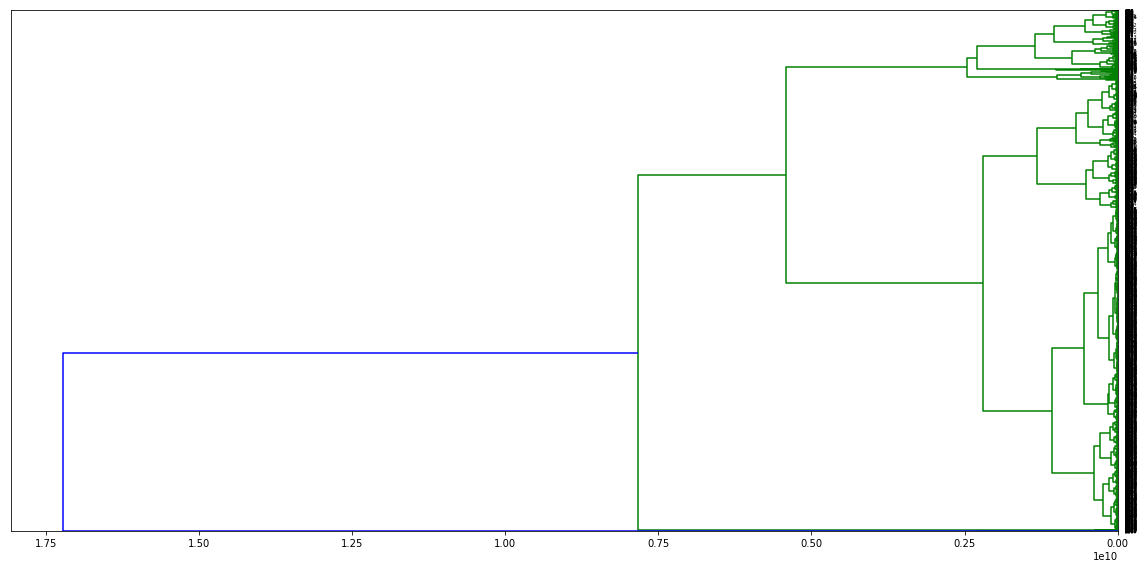

In [98]:
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="left")
plt.tight_layout() # fixes margins

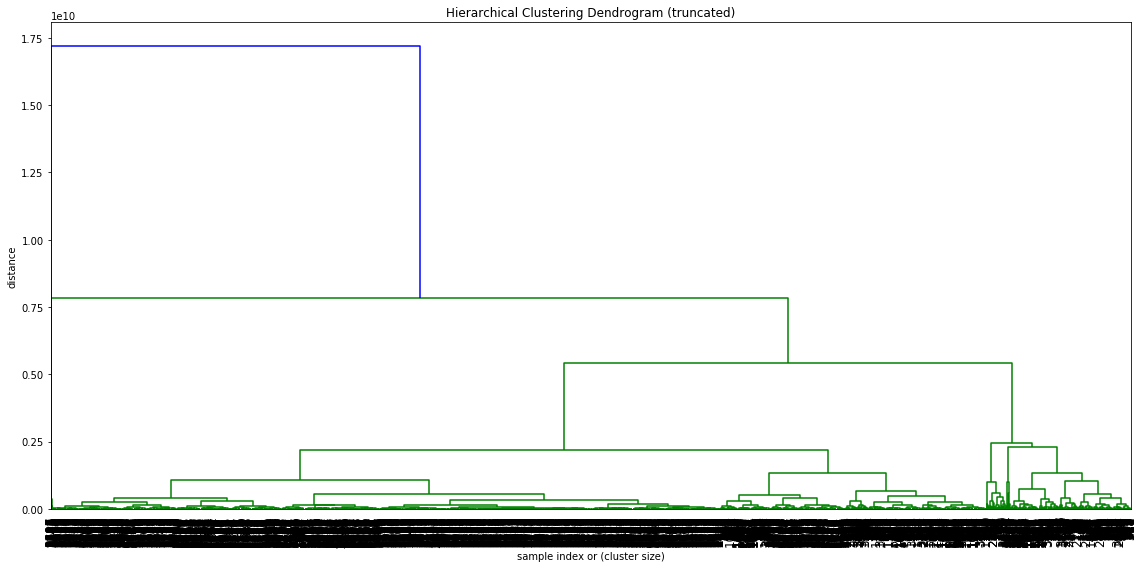

In [106]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           #truncate_mode='lastp',  # show only the last p merged clusters
           #p=12,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

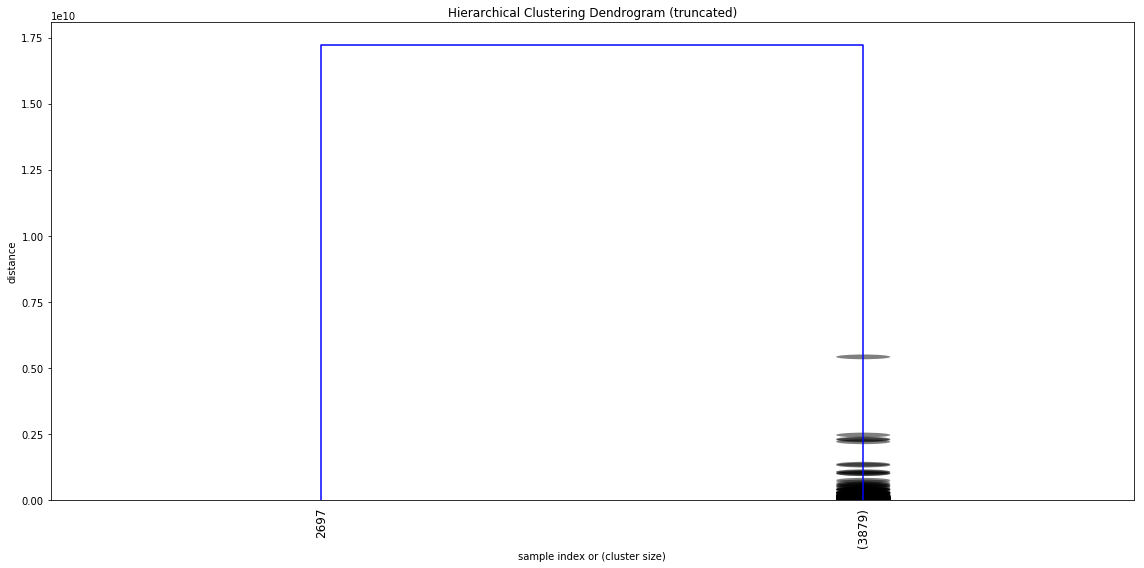

In [107]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=2,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

I didvided all data to two different clusters. Firstly using K-Mean and secondly using Agglomerative clustering analysis. From K-Mean cluster we can see which observation belong to which cluster. K-Mean give me more data about each variable than Agglomerative analysis. Using Agglomerative analysis we can see distance between different clusters. There are 2697 observations in the first cluster and 3879 observation in the second cluster. 

# 9. Storytelling

Film studios produces several hundred movies in different language. The budget of thesemovies are of the order of hundreds of millions of dollars. Knowing which movies are likely to succeed and which are likely to fail could beneﬁt the production houses greatly as it will enable them to focus their advertising campaigns which itself cost millions of dollars, accordingly. And it could also help them to know when it is most appropriate to release a movie by looking at the overall market.  

The highly correlated to imdb_score are:
    
    num_voted_user
    num_critic_for_reviews
    num_user_for_reviews
    duration

For prediction how a movie will be perform I would looking for data:

    director name - name of the movie director
    main actor name - name of the first actor in the movie
    duration
 
 From the social media like Facebook or Twitter I can find lots of important informations about number of voted user, number of critics for review and number of user for reviews. It is possible to see if people are interesting about movie, if they are looking forward to see this movie in the cinema. We can make advertising about the movie.

The initial dataset to be used will be collected from IMDb.It will consist of movies that were released from year 1916 to 2016. For each film I can see direct name, duration, country, language, movie type and other movie characteristics

    - movie can be black and white or colorfull
    - duration movie average is 107 minutes
    - the highest number of likes on the facebbook platform has Joseph Gordon-Levitt
    - John Blanchard has the best imdb_score
    - Steven Spielberg is the most common movie director in dataset
    - the most popular actor is Robert De Niro
    - the actor with the higher number of likes on the Facebook is Darcy Donavan
    - the most popular movies are produced in USA
    
From the data it is possible to see that Joseph Gordon Levittt has the highest number of Facebook likes but he does not belong to the first 3 best director in terms of imdb score. We can also say that Steven Spielberg is the director with the highest numebr of movies. From correlation analysis it is possible to see that there is poor correlation between imdb_score and movie director. We can not say with the high probability that movie with the most popular director will be succesfull movie. 

From the data it is possible to see that Darcy Donavan has the highest number of Facebook likes but he does not belong to the first 3 best actor 1 in terms of imdb score. We can also say that Robert De Niro played in the highest numebr of movies. From correlation analysis it is possible to see that there is poor correlation between imdb_score and actor 1 who played in the movie. We can not say that movie with the most populat actor will be succesfull movie. 

There is strongly relationship between imdb_score and number of voted users. It means that with the higher number of voted users, imdb score is higher.
There is also strongly correlation between imdb_score and number of critic for reviews. With the higher number of critic for reviews, imdb score is higher.
There is strongly correlation between duration and imdb_score. When we spend more time on creating movie, imdb score is higher.

We can predict that when we focus on the movie and spend more time on creating the movie our imdb score should be higher. There is not big correlation imdb and director or actor. When we will have the best actor in the movie, it does not mean that our movie will be succesfull. If I want to see if movie will be succesfull, I should look on the social media and see what people think about the movie.

From the data we can see prediction of linear regression. We can see for which variable should we focus on and on which not.

    0	duration	            1.149989e-02
    1	director_facebook_likes	6.538867e-06
    2	actor_1_facebook_likes	1.083255e-05
    3	gross	                -1.985789e-09
    4	num_voted_users	        4.123976e-06
    5	cast_total_facebook_likes	-9.272106e-06
    6	facenumber_in_poster	-3.546854e-02
    7	num_user_for_reviews	-4.385848e-04
    8	budget	                -2.079606e-11
    9	movie_facebook_likes	2.070630e-06

From linear regression we can see that there is big linear regression with director_facebook_likes and also high linear regression with num_voted_users and low linear regression with cast_total_facebook_likes. I would focus on the two variables with the higher linear regression.

It is possible to use lots of different analyses and method. For my analysis I used more different analysis and I got the higher accurancy 76% by using Random Forest. From classification analyses I got almost same result. The most importance features are num_voted_users and duration. Accuracy is almost 76% using random forest analyse. It means, that lots of data were correclty classified. We can say that variables num_voted_users and movie duration are the most important. 

I didvided all data to two different clusters. Firstly using K-Mean and secondly using Agglomerative clustering analysis. From K-Mean cluster we can see which observation belong to which cluster. K-Mean give me more data about each variable than Agglomerative analysis. Using Agglomerative analysis we can see distance between different clusters. There are 2697 observations in the first cluster and 3879 observation in the second cluster. 